In [1]:
from __future__ import division
from __future__ import print_function

import time
import numpy as np

import torch
import torch.nn.functional as F
import torch.optim as optim

from utils import load_data, test, run_experiment
from models import GCN_2, GCN_3, ite_GCN

In [2]:
adj, features, labels, idx_train, idx_val, idx_test = load_data(path="../data/cora/", dataset="cora")

Loading cora dataset...


In [3]:
hidden = 16
dropout = 0.5
lr = 0.01
weight_decay = 5e-4
num_epochs = 200
smooth_fac = 0.7

In [4]:
model0 = GCN_2(nfeat=features.shape[1],
            nhid=hidden,
            nclass=labels.max().item() + 1,
            dropout=dropout
)
run_experiment(num_epochs=num_epochs, model=model0, lr=lr, weight_decay=weight_decay, features=features, adj=adj, idx_train=idx_train, idx_val=idx_val, idx_test=idx_test, labels=labels)


Intialize a 2-layer GCN
runrunrun!
Epoch: 0001 loss_train: 1.9462 acc_train: 0.1714 loss_val: 1.9071 acc_val: 0.3500 time: 0.0412s
Epoch: 0002 loss_train: 1.9493 acc_train: 0.1714 loss_val: 1.8976 acc_val: 0.3500 time: 0.0182s
Epoch: 0003 loss_train: 1.9258 acc_train: 0.2571 loss_val: 1.8879 acc_val: 0.3500 time: 0.0112s
Epoch: 0004 loss_train: 1.9006 acc_train: 0.2786 loss_val: 1.8780 acc_val: 0.3500 time: 0.0082s
Epoch: 0005 loss_train: 1.8983 acc_train: 0.2857 loss_val: 1.8680 acc_val: 0.3500 time: 0.0081s
Epoch: 0006 loss_train: 1.8881 acc_train: 0.2929 loss_val: 1.8580 acc_val: 0.3500 time: 0.0076s
Epoch: 0007 loss_train: 1.8805 acc_train: 0.2857 loss_val: 1.8483 acc_val: 0.3500 time: 0.0066s
Epoch: 0008 loss_train: 1.8681 acc_train: 0.2929 loss_val: 1.8387 acc_val: 0.3500 time: 0.0071s
Epoch: 0009 loss_train: 1.8635 acc_train: 0.2929 loss_val: 1.8294 acc_val: 0.3500 time: 0.0088s
Epoch: 0010 loss_train: 1.8383 acc_train: 0.2929 loss_val: 1.8204 acc_val: 0.3500 time: 0.0074s
Epoch

In [5]:
model1 = GCN_3(nfeat=features.shape[1],
            nhid=hidden,
            nclass=labels.max().item() + 1,
            dropout=dropout)
run_experiment(num_epochs=num_epochs, model=model1, lr=lr, weight_decay=weight_decay, features=features, adj=adj, idx_train=idx_train, idx_val=idx_val, idx_test=idx_test, labels=labels)


Intialize a 3-layer GCN
runrunrun!
Epoch: 0001 loss_train: 1.9554 acc_train: 0.1500 loss_val: 1.9204 acc_val: 0.1267 time: 0.0131s
Epoch: 0002 loss_train: 1.9215 acc_train: 0.1786 loss_val: 1.8900 acc_val: 0.3500 time: 0.0111s
Epoch: 0003 loss_train: 1.8981 acc_train: 0.3143 loss_val: 1.8621 acc_val: 0.3500 time: 0.0092s
Epoch: 0004 loss_train: 1.8616 acc_train: 0.3071 loss_val: 1.8374 acc_val: 0.3500 time: 0.0104s
Epoch: 0005 loss_train: 1.8664 acc_train: 0.2857 loss_val: 1.8164 acc_val: 0.3500 time: 0.0093s
Epoch: 0006 loss_train: 1.8186 acc_train: 0.2929 loss_val: 1.7993 acc_val: 0.3500 time: 0.0089s
Epoch: 0007 loss_train: 1.8329 acc_train: 0.2857 loss_val: 1.7870 acc_val: 0.3500 time: 0.0091s
Epoch: 0008 loss_train: 1.8034 acc_train: 0.2857 loss_val: 1.7789 acc_val: 0.3500 time: 0.0085s
Epoch: 0009 loss_train: 1.8322 acc_train: 0.2786 loss_val: 1.7740 acc_val: 0.3500 time: 0.0125s
Epoch: 0010 loss_train: 1.8145 acc_train: 0.2929 loss_val: 1.7710 acc_val: 0.3500 time: 0.0087s
Epoch

In [6]:
model2 = ite_GCN(nfeat=features.shape[1],
            nclass=labels.max().item() + 1,
            dropout=dropout,
            train_nite= 2,
            eval_nite= 0,
            allow_grad=True,
            smooth_fac=smooth_fac)
run_experiment(num_epochs=num_epochs, model=model2, lr=lr, weight_decay=weight_decay, features=features, adj=adj, idx_train=idx_train, idx_val=idx_val, idx_test=idx_test, labels=labels)

Unspecified or invalid number of iterations for inference. Treat as the same as training iterations.
Initialize a 1-layer GCN with  2 training iterations and  2  inference iterations.
Gradient flows to all iterations:  True
runrunrun!
Epoch: 0001 loss_train: 1.9445 acc_train: 0.2214 loss_val: 1.9053 acc_val: 0.3500 time: 0.4156s
Epoch: 0002 loss_train: 1.9054 acc_train: 0.2929 loss_val: 1.8326 acc_val: 0.3500 time: 0.3954s
Epoch: 0003 loss_train: 1.8354 acc_train: 0.2929 loss_val: 1.7862 acc_val: 0.3500 time: 0.3939s
Epoch: 0004 loss_train: 1.7948 acc_train: 0.2929 loss_val: 1.7667 acc_val: 0.3500 time: 0.4238s
Epoch: 0005 loss_train: 1.7641 acc_train: 0.2929 loss_val: 1.7358 acc_val: 0.3500 time: 0.3891s
Epoch: 0006 loss_train: 1.7182 acc_train: 0.2929 loss_val: 1.7192 acc_val: 0.3500 time: 0.3789s
Epoch: 0007 loss_train: 1.6792 acc_train: 0.2929 loss_val: 1.6663 acc_val: 0.3500 time: 0.3804s
Epoch: 0008 loss_train: 1.6184 acc_train: 0.2929 loss_val: 1.5958 acc_val: 0.3500 time: 0.391

In [7]:
model3 = ite_GCN(nfeat=features.shape[1],
            nclass=labels.max().item() + 1,
            dropout=dropout,
            train_nite= 3,
            eval_nite= 0,
            allow_grad=True,
            smooth_fac=smooth_fac)
run_experiment(num_epochs=num_epochs, model=model3, lr=lr, weight_decay=weight_decay, features=features, adj=adj, idx_train=idx_train, idx_val=idx_val, idx_test=idx_test, labels=labels)

Unspecified or invalid number of iterations for inference. Treat as the same as training iterations.
Initialize a 1-layer GCN with  3 training iterations and  3  inference iterations.
Gradient flows to all iterations:  True
runrunrun!
Epoch: 0001 loss_train: 1.9458 acc_train: 0.1143 loss_val: 1.8757 acc_val: 0.3500 time: 0.6368s
Epoch: 0002 loss_train: 1.8788 acc_train: 0.2929 loss_val: 1.8139 acc_val: 0.3500 time: 0.6419s
Epoch: 0003 loss_train: 1.8251 acc_train: 0.2929 loss_val: 1.7831 acc_val: 0.3500 time: 0.6410s
Epoch: 0004 loss_train: 1.7814 acc_train: 0.2929 loss_val: 1.7665 acc_val: 0.3500 time: 0.6417s
Epoch: 0005 loss_train: 1.7606 acc_train: 0.2929 loss_val: 1.7165 acc_val: 0.3500 time: 0.6426s
Epoch: 0006 loss_train: 1.7020 acc_train: 0.2929 loss_val: 1.6492 acc_val: 0.3500 time: 0.7974s
Epoch: 0007 loss_train: 1.6183 acc_train: 0.2929 loss_val: 1.5745 acc_val: 0.3500 time: 0.6333s
Epoch: 0008 loss_train: 1.5066 acc_train: 0.3000 loss_val: 1.4375 acc_val: 0.3533 time: 0.641

In [8]:
test_losses = []
test_accuracies = []

for i in range(1, 30):
    model = ite_GCN(nfeat=features.shape[1],
            nclass=labels.max().item() + 1,
            dropout=dropout,
            train_nite= 2,
            eval_nite= i,
            allow_grad=True,
            smooth_fac=smooth_fac)
    model.load_state_dict(model2.state_dict().copy())
    loss_test, acc_test = test(model, features, adj, idx_test, labels)
    test_losses.append(loss_test.item())
    test_accuracies.append(acc_test.item())


Initialize a 1-layer GCN with  2 training iterations and  1  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 1.3587 accuracy= 0.7850
inference time:  0.06373000144958496
Initialize a 1-layer GCN with  2 training iterations and  2  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 0.6952 accuracy= 0.7930
inference time:  0.11499691009521484
Initialize a 1-layer GCN with  2 training iterations and  3  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 1.2885 accuracy= 0.7840
inference time:  0.18901300430297852
Initialize a 1-layer GCN with  2 training iterations and  4  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 4.3290 accuracy= 0.7580
inference time:  0.23212695121765137
Initialize a 1-layer GCN with  2 training iterations and  5  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 14.7197 accuracy= 0.7

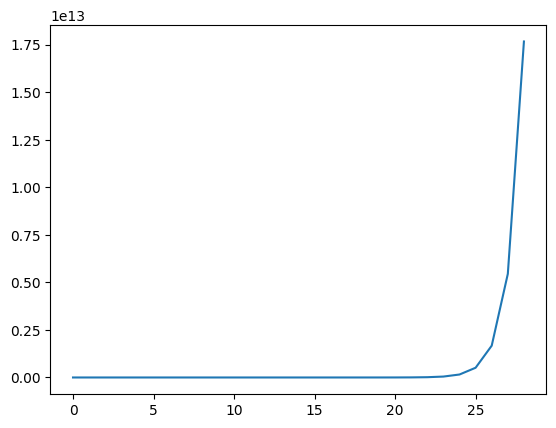

In [9]:
import matplotlib.pyplot as plt
plt.plot(test_losses)

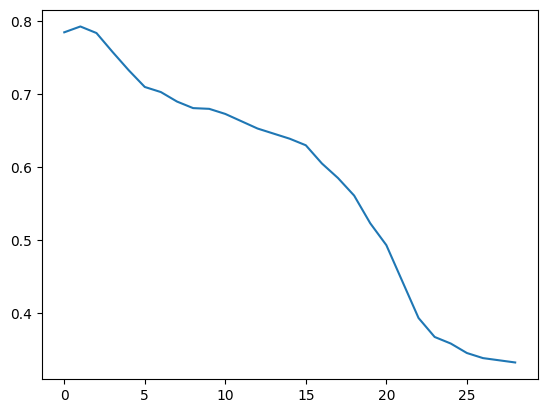

In [10]:
plt.plot(test_accuracies)

In [11]:
test_losses = []
test_accuracies = []

for i in range(1, 30):
    model = ite_GCN(nfeat=features.shape[1],
            nclass=labels.max().item() + 1,
            dropout=0,
            train_nite= 3,
            eval_nite= i,
            allow_grad=True,
            smooth_fac=smooth_fac)
    model.load_state_dict(model3.state_dict().copy())
    loss_test, acc_test = test(model, features, adj, idx_test, labels)
    test_losses.append(loss_test.item())
    test_accuracies.append(acc_test.item())


Initialize a 1-layer GCN with  3 training iterations and  1  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 1.6504 accuracy= 0.6710
inference time:  0.05514883995056152
Initialize a 1-layer GCN with  3 training iterations and  2  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 1.1043 accuracy= 0.7170
inference time:  0.11682891845703125
Initialize a 1-layer GCN with  3 training iterations and  3  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 0.9073 accuracy= 0.7460
inference time:  0.1653728485107422
Initialize a 1-layer GCN with  3 training iterations and  4  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 2.7239 accuracy= 0.7220
inference time:  0.23105812072753906
Initialize a 1-layer GCN with  3 training iterations and  5  inference iterations.
Gradient flows to all iterations:  True
Test set results: loss= 11.1371 accuracy= 0.65

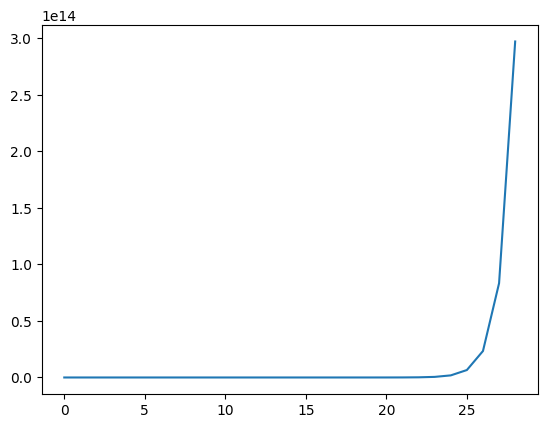

In [12]:
plt.plot(test_losses)

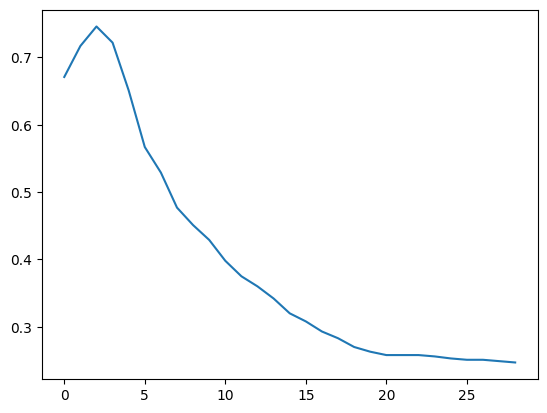

In [13]:
plt.plot(test_accuracies)